In [1]:
import pandas as pd
import seaborn as sns
sns.set(context="notebook",style = "whitegrid")
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [2]:
df = pd.read_csv('ex2data1.txt',names=['exml1','exml2','isadmit'])
df.head()

,exml1,exml2,isadmit
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


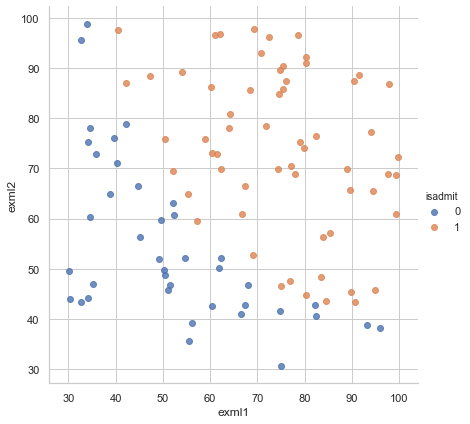

In [3]:
sns.lmplot(x='exml1',y='exml2',data = df,hue='isadmit',height=6,fit_reg=False)

# Sigmoid

 $$
 g(z) = \frac{1}{1+e^{-z}} 
 $$

$$
h_{\theta}(x) = \frac{1}{1+e^{-{\theta}^T{X}}}
$$

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

$$
J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}
$$ 

In [5]:
df.insert(0,'Ones',1)

In [6]:
cols = df.shape[1]
X = np.array(df.iloc[:,0:cols-1].values)
Y = np.array(df.iloc[:,cols-1:cols].values)
theta = np.array(np.zeros(3))

In [7]:
X.shape,theta.shape,Y.shape,(X*theta.T).shape

((100, 3), (3,), (100, 1), (100, 3))

In [8]:
def cost(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(Y)
    first = np.multiply(-Y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))
    return (np.sum(first-second))/(len(X))

In [9]:
cost(theta,X,Y)

0.6931471805599453

# Gradient descent

$$\frac{\partial J\left( \theta \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$

 $$
 {\theta_j}:={\theta_j}-\alpha \frac{1}{m}\sum\limits_{i=1}^{m}{({h_\theta}({{x}^{(i)}})-{{y}^{(i)}}){x_{j}}^{(i)}}
 $$

In [10]:
def gradient_descent(theta,X,Y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    parameters = int(theta.shape[1])
    error = sigmoid(X*theta.T) - Y
    grad = np.zeros(parameters)
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        grad[i] = np.sum(term)/len(X)
    return grad

In [11]:
gradient_descent(theta,X,Y)

array([ -0.1       , -12.00921659, -11.26284221])

In [12]:
import scipy.optimize as opt
result = opt.fmin_tnc(func=cost, x0=theta, fprime=gradient_descent, args=(X, Y))
result

(array([-25.16131872,   0.20623159,   0.20147149]), 36, 0)

In [13]:
cost(result[0],X,Y)

0.20349770158947425

In [14]:
def predict(theta,X):
    probability = sigmoid(X*theta.T)
    return [1 if x>= 0.5 else 0 for x in probability]

In [15]:
theta_min = np.matrix(result[0])
predictions = predict(theta_min,X)
correct = [1 if ((a==1 and b==1) or (a == 0 and b == 0)) else 0 for (a,b) in zip(predictions,Y)]
accuracy = (sum(map(int,correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 89%


In [16]:
path =  'ex2data2.txt'
df2 = pd.read_csv(path, header=None, names=['Test 1', 'Test 2', 'Accepted'])
df2.head()

,Test 1,Test 2,Accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


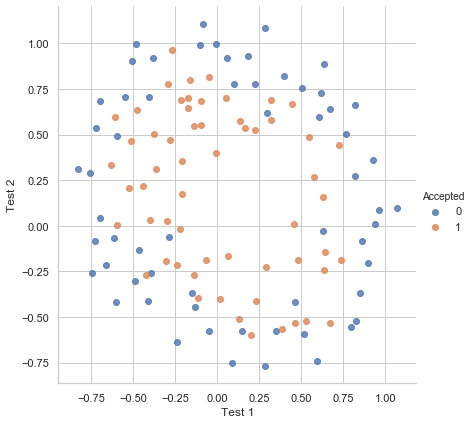

In [17]:
sns.lmplot(x='Test 1',y='Test 2',data = df2,hue='Accepted',height=6,fit_reg=False)

In [18]:
#构造多项式
degree = 5
x1 = df2['Test 1']
x2 = df2['Test 2']

df2.insert(3, 'Ones', 1)

for i in range(1, degree):
    for j in range(0, i):
        df2['F' + str(i) + str(j)] = np.power(x1, i-j) * np.power(x2, j)

df2.drop('Test 1', axis=1, inplace=True)
df2.drop('Test 2', axis=1, inplace=True)

df2.head()

,Accepted,Ones,F10,F20,F21,F30,F31,F32,F40,F41,F42,F43
0,1,1,0.051267,0.002628,0.035864,0.000135,0.001839,0.025089,0.000007,0.000094,0.001286,0.017551
1,1,1,-0.092742,0.008601,-0.063523,-0.000798,0.005891,-0.043509,0.000074,-0.000546,0.004035,-0.029801
2,1,1,-0.213710,0.045672,-0.147941,-0.009761,0.031616,-0.102412,0.002086,-0.006757,0.021886,-0.070895
3,1,1,-0.375000,0.140625,-0.188321,-0.052734,0.070620,-0.094573,0.019775,-0.026483,0.035465,-0.047494
4,1,1,-0.513250,0.263426,-0.238990,-0.135203,0.122661,-0.111283,0.069393,-0.062956,0.057116,-0.051818


$$
J\left( \theta \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}+\frac{\lambda }{2m}\sum\limits_{j=1}^{n}{\theta _{j}^{2}}
$$

$$
    \begin{align} & Repeat\text{ }until\text{ }convergence\text{ }\!\!\{\!\!\text{ } \\ & \text{ }{{\theta }_{0}}:={{\theta }_{0}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{_{0}}^{(i)}} \\ & \text{ }{{\theta }_{j}}:={{\theta }_{j}}-a\frac{1}{m}\sum\limits_{i=1}^{m}{[{{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}}]x_{j}^{(i)}}+\frac{\lambda }{m}{{\theta }_{j}} \\ & \text{ }\!\!\}\!\!\text{ } \\ & Repeat \\ \end{align}
    $$

 $$
 {{\theta }_{j}}:={{\theta }_{j}}(1-a\frac{\lambda }{m})-a\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{j}^{(i)}}
 $$

In [19]:
def cost2(theta,X,Y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    first = np.multiply(-Y, np.log(sigmoid(X * theta.T)))
    second = np.multiply((1 - Y), np.log(1 - sigmoid(X * theta.T)))
    reg = (learningRate/(2*len(X)))*np.sum(np.power(theta[:,1:theta.shape[1]],2))
    return np.sum(first-second)/(len(X))+reg

In [20]:
def gradientReg_descent(theta,X,Y,learningRate):
    theta = np.matrix(theta)
    X = np.matrix(X)
    Y = np.matrix(Y)
    parameters = int(theta.shape[1])
    error = sigmoid(X*theta.T) - Y
    grad = np.zeros(parameters)
    for i in range(parameters):
        term = np.multiply(error,X[:,i])
        if i == 0:
            grad[i] = np.sum(term)/len(X)
        else:
            grad[i] = np.sum(term)/len(X) + ((learningRate/len(X)))*theta[:,i]
    return grad

In [21]:
cols = df2.shape[1]
X2 = np.array(df2.iloc[:,1:cols].values)
Y2 = np.array(df2.iloc[:,0:1].values)
theta2 = np.array(np.zeros(11))

In [22]:
learningRate = 1

In [23]:
cost2(theta2,X2,Y2,learningRate)

0.6931471805599454

In [24]:
gradientReg_descent(theta2,X2,Y2,learningRate)

array([0.00847458, 0.01878809, 0.05034464, 0.01150133, 0.01835599,
       0.00732393, 0.00819244, 0.03934862, 0.00223924, 0.01286005,
       0.00309594])

In [25]:
result2 = opt.fmin_tnc(func=cost2,x0=theta2,fprime=gradientReg_descent,args=(X2,Y2,learningRate))
result2

(array([ 0.53010248,  0.29075567, -1.60725764, -0.5821382 ,  0.01781027,
        -0.21329508, -0.40024142, -1.37144139,  0.02264303, -0.9503358 ,
         0.0344085 ]), 22, 1)

In [26]:
theta_min = np.matrix(result2[0])
predictions = predict(theta_min, X2)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, Y2)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 78%


In [30]:
from sklearn import linear_model#调用sklearn的线性回归包
model = linear_model.LogisticRegression(penalty='l2', C=1.0)
model.fit(X2, Y2.ravel())
model.score(X2, Y2)

0.6610169491525424